Урок 8. Корреляционный анализ

1.Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy Полученные значения должны быть равны. Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
zp =np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks =np.array ([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

$$cov_{xy}=M(XY)-M(X)*M(Y)$$
где М - математическое ожидание

In [4]:
M_X=zp.mean()
M_X

101.4

In [5]:
M_Y=ks.mean()
M_Y

709.9

In [6]:
std_X = zp.std()
std_X

59.115480206118605

In [8]:
std_Y = ks.std()
std_Y

174.55340157098058

In [9]:
M_XY = (zp * ks).mean()
M_XY

81141.7

Воспользуемся формулой :
$$cov_{xy}=M(XY)-M(X)*M(Y)$$

In [10]:
cov_ks = M_XY - M_X * M_Y
cov_ks

9157.839999999997

Зная ковариацию и среднее квадратичное отклонение каждого из двух признаков, можно вычислить коэффициент корреляции Пирсона:

$$r_{xy}=\frac{cov_xy}{\sigma_x*\sigma_y}$$

In [11]:
corP=cov_ks/(std_X*std_Y)
corP

0.8874900920739158

библиотека Numpy:

In [12]:
zp =np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks =np.array ([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [13]:
np.corrcoef(zp, ks,)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [14]:
np.cov(zp,ks,ddof=0) 

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

библиотека Pandas:

In [15]:
zp = ([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = ([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [16]:
df = pd.DataFrame({'zp' :[35, 45, 190, 200, 40, 70, 54, 150, 120, 110]  , 'ks' :[401, 574, 874, 919, 459, 739, 653, 902, 746, 832] })
df.sample(1)

,zp,ks
7,150,902


In [17]:
zp_mean=df['zp'].mean()
zp_mean

101.4

In [19]:
zp_std=df['zp'].std(ddof=0)
zp_std

59.115480206118605

In [20]:
ks_mean=df['ks'].mean()
ks_mean

709.9

In [21]:
ks_std=df['ks'].std(ddof=0)
ks_std

174.55340157098058

In [22]:
df.mean()

zp    101.4
ks    709.9
dtype: float64

In [23]:
df.std(ddof=0)

zp     59.115480
ks    174.553402
dtype: float64

In [24]:
df.cov(ddof=0)

,zp,ks
zp,3494.64,9157.84
ks,9157.84,30468.89


In [32]:
df.cov()  #Несмещаная ковариация

In [29]:
df.corr()

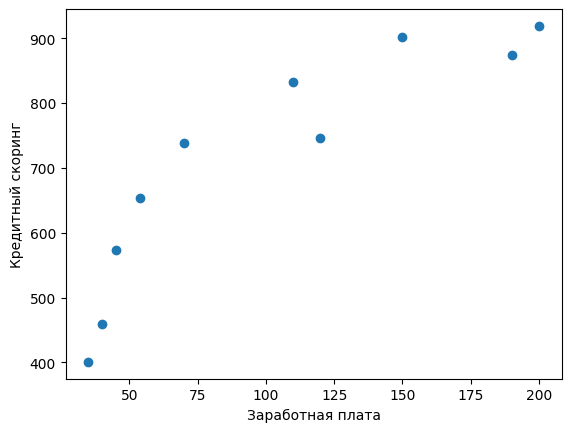

In [34]:
plt.scatter(zp,ks)
plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг');

2.Измерены значения IQ выборки студентов, обучающихся в местных технических вузах: 131, 125, 115, 122, 131, 115, 107, 99, 125, 111. Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [56]:
data = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
data_mean = data.mean()
data_mean



118.1

In [57]:
sigma = data.std(ddof=1) # несмещенное стандартное отклонение
sigma

10.54566788359614

In [58]:
n=len(data)
print(n)
a=0.05
t=stats.t.ppf( 1-a/2, n-1)
print(f'Значение t-критерия для 0.95% доверительного интервала = {t}')

10
Значение t-критерия для 0.95% доверительного интервала = 2.2621571627409915


In [59]:
l_x=(data_mean-t*sigma/np.sqrt(n),(data_mean+t*sigma/np.sqrt(n)))
print(f"Доверительный интервал для 'для математического ожидания' составляет {l_x}")

Доверительный интервал для 'для математического ожидания' составляет (110.55608365158724, 125.64391634841274)


3.Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [60]:
n=27
ds=25
mean=174.2
sigma=(ds)**0.5
sigma

5.0

In [61]:
t=stats.t.ppf( 1-a/2, n-1)
t

2.055529438642871

In [62]:
mat=(mean-t*sigma/np.sqrt(n),(mean+t*sigma/np.sqrt(n)))
print(f"Доверительный интервал для 'для математического ожидания' составляет {mat}")

Доверительный интервал для 'для математического ожидания' составляет (172.2220658754539, 176.17793412454608)
